In [108]:
import save as sv
import utils as ut
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [109]:
# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
base = sv.lectureFichier("./bigbase")

In [111]:
base

,movie,subtitles,Genre
0,call the midwife,young seems door closed though hearts open eve...,drama
1,homeland,sync corrections n www addic ed com air naval ...,thriller
2,hidden,client want find someone much know gina lot le...,drama
3,public enemies,last ten years look risk others way round incr...,drama
4,the protector,boys going late bus chewing fast hey uh nichol...,action
...,...,...,...
1123,secret girlfriend,nipple wars vanquished lord phil master oh hur...,comedy
1124,life is wild,font color anything better family trip think t...,drama
1125,sit down shut up,honk honk high schlosers make way teacher litt...,family
1126,the jeff dunham show,transcript addic ed com crazymaggot addic ed c...,comedy


In [112]:
base["Genre"].unique()

array(['drama', 'thriller', 'action', 'comedy', 'reality', 'family',
       'documentary', 'autre'], dtype=object)

In [113]:
base

,movie,subtitles,Genre
0,call the midwife,young seems door closed though hearts open eve...,drama
1,homeland,sync corrections n www addic ed com air naval ...,thriller
2,hidden,client want find someone much know gina lot le...,drama
3,public enemies,last ten years look risk others way round incr...,drama
4,the protector,boys going late bus chewing fast hey uh nichol...,action
...,...,...,...
1123,secret girlfriend,nipple wars vanquished lord phil master oh hur...,comedy
1124,life is wild,font color anything better family trip think t...,drama
1125,sit down shut up,honk honk high schlosers make way teacher litt...,family
1126,the jeff dunham show,transcript addic ed com crazymaggot addic ed c...,comedy


In [425]:
xtrain, xval, ytrain, yval = train_test_split(base['subtitles'], base['Genre'], test_size=0.05, random_state=9)

In [426]:
xtrain

1068    bernard another solicitor letter put others ma...
742     mais qui est donc ce super heros le sergent co...
271     kids good jane gave really hard time morning g...
30      previously alcatraz meet worst criminals count...
143     theme music playing zena fill candy machine hi...
                              ...                        
56      si ringrazia lo staff della senatrice samuels ...
501     previously set start finish reardon goes killi...
638     synced corrected katniss everdeen www addic ed...
348     hot cleveland recorded front live studio audie...
382     never easily loved clumsy girl looks good pink...
Name: subtitles, Length: 1071, dtype: object

In [427]:
tfidf_vectorizer = TfidfVectorizer(min_df=0.0,max_df=0.95, max_features=10000)

In [428]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

Logistic Regression: 0.483749 (0.046856)
Random Forest Classifier: 0.490256 (0.041607)
K Neighbors Classifier: 0.208238 (0.040413)
Decision Tree Classifier(): 0.382018 (0.055142)
Ada Boost Classifier: 0.366970 (0.040928)
SVM: 0.482814 (0.050136)


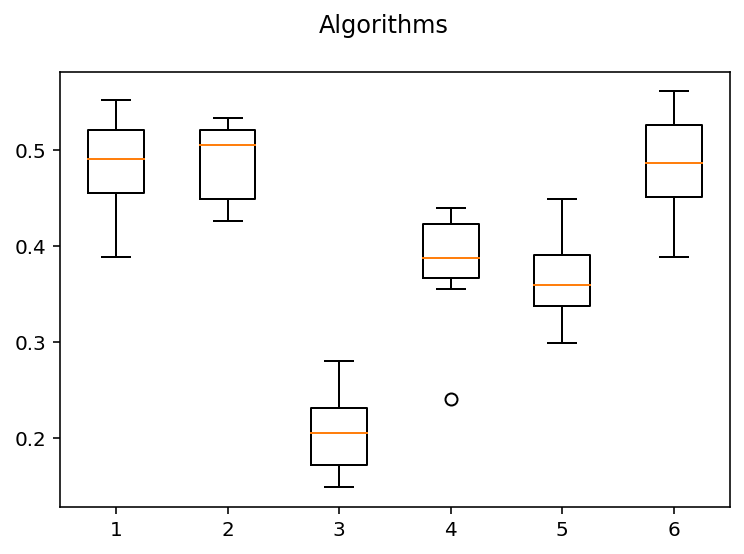

In [432]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('K Neighbors Classifier', KNeighborsClassifier()))
models.append(('Decision Tree Classifier()', DecisionTreeClassifier()))
models.append(('Ada Boost Classifier', AdaBoostClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    cv_results = model_selection.cross_val_score(model, xtrain_tfidf, ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [289]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Performance metric
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [314]:
lr = LogisticRegression()
#clf = OneVsRestClassifier(lr)

In [315]:
# fit model on train data
lr.fit(xtrain_tfidf, ytrain)

LogisticRegression()

In [316]:
# make predictions for validation set
y_pred = lr.predict(xval_tfidf)

In [317]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.5087719298245614

In [324]:
b=OneVsRestClassifier(lr)
b.fit(xtrain_tfidf, ytrain) 
y_pred = b.predict(xval_tfidf)
f1_score(yval, y_pred, average="micro")

0.49122807017543857

In [318]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(xtrain_tfidf, ytrain) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [319]:
y_pred = classifier.predict(xval_tfidf)

In [320]:
f1_score(yval, y_pred, average="micro")

0.49122807017543857

In [321]:
c=OneVsRestClassifier(classifier)
c.fit(xtrain_tfidf, ytrain) 

OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=1000,
                                                     random_state=0))

In [323]:
y_pred = c.predict(xval_tfidf)
f1_score(yval, y_pred, average="micro")

0.5087719298245614

In [325]:
param_grid = { "n_estimators"      : [250, 1000],
           "criterion"         : ["gini", "entropy"],
           "max_features"      : [3,4,5],
           "max_depth"         : [10, 20],
           "min_samples_split" : [2, 4] ,
           "bootstrap": [True, False]}

In [326]:
grid_search = GridSearchCV(classifier, param_grid, n_jobs=-1, cv=10)
grid_search.fit(xtrain_tfidf, ytrain)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'min_samples_split': 4, 'n_estimators': 1000}
0.4733817930079612


In [327]:
abc = AdaBoostClassifier()
abc.fit(xtrain_tfidf,ytrain)
y_pred = abc.predict(xval_tfidf)
abc.score(xval_tfidf,yval)

0.3157894736842105

In [328]:
param_grid = {"n_estimators" : [100,200,1000],
              "learning_rate" : [0.1,0.001,1]
              }

In [329]:
grid_search = GridSearchCV(abc, param_grid, n_jobs=-1, cv=10)
grid_search.fit(xtrain_tfidf, ytrain)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'n_estimators': 200}
0.4257442021460712


Distribution Genre


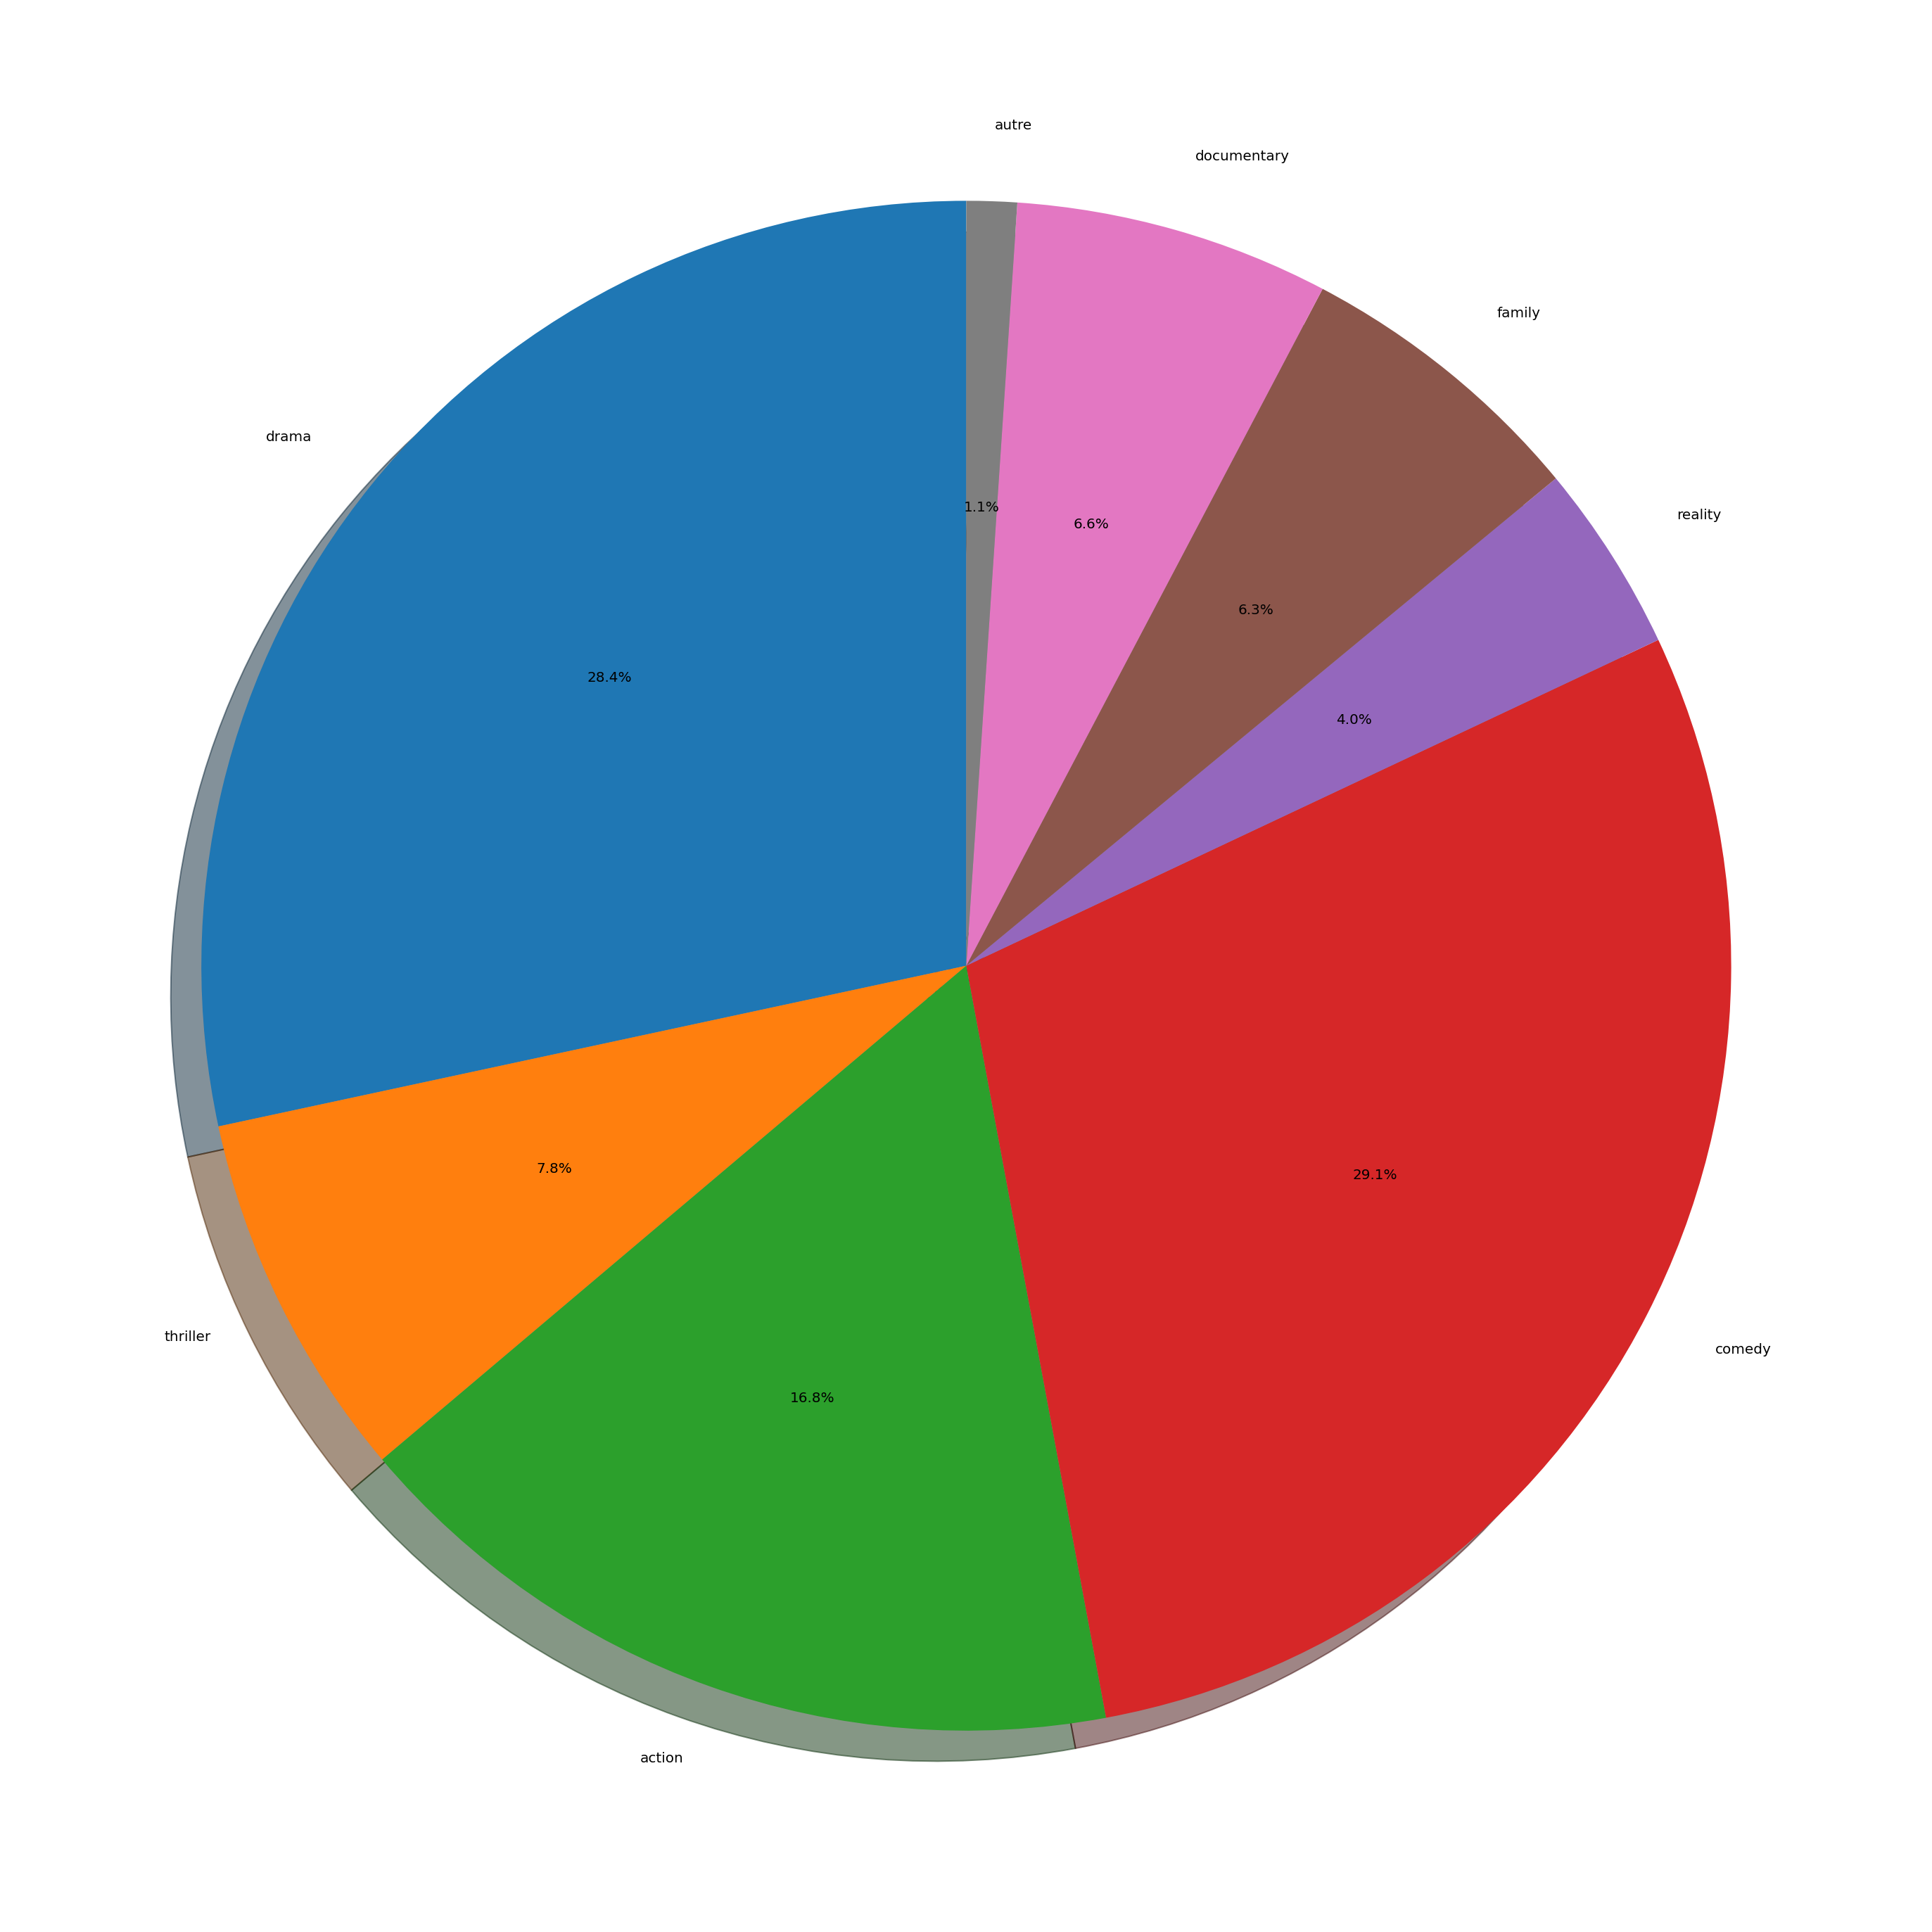

In [339]:
from collections import Counter
import matplotlib.pyplot as plt
count = Counter(base['Genre'])
list_genre = []
list_valeur = []
for i in  count:
    list_genre.append(i)
    list_valeur.append(count[i])
plt.figure(figsize=(25,25))
plt.pie(list_valeur, labels=list_genre, 
        autopct='%1.1f%%', shadow=True, startangle=90)
print('Distribution Genre')

In [398]:
basen=base
basen

,movie,subtitles,Genre
0,call the midwife,young seems door closed though hearts open eve...,drama
1,homeland,sync corrections n www addic ed com air naval ...,thriller
2,hidden,client want find someone much know gina lot le...,drama
3,public enemies,last ten years look risk others way round incr...,drama
4,the protector,boys going late bus chewing fast hey uh nichol...,action
...,...,...,...
1123,secret girlfriend,nipple wars vanquished lord phil master oh hur...,comedy
1124,life is wild,font color anything better family trip think t...,drama
1125,sit down shut up,honk honk high schlosers make way teacher litt...,family
1126,the jeff dunham show,transcript addic ed com crazymaggot addic ed c...,comedy


In [399]:
basenn = basen.head(500)

In [400]:
basenn=basenn.drop(basenn[basenn['Genre']=='action'].index)

In [401]:
basennn = basen.tail(628)

In [402]:
basennn=basennn.drop(basennn[basennn['Genre']=='drama'].index)

In [403]:
basennn=basennn.drop(basennn[basennn['Genre']=='comedy'].index)

In [404]:
hh = pd.concat([basenn, basennn])

In [405]:
hh

,movie,subtitles,Genre
0,call the midwife,young seems door closed though hearts open eve...,drama
1,homeland,sync corrections n www addic ed com air naval ...,thriller
2,hidden,client want find someone much know gina lot le...,drama
3,public enemies,last ten years look risk others way round incr...,drama
5,the protector,boys going late bus chewing fast hey uh nichol...,drama
...,...,...,...
1099,the civil war,shared http djj home sapo pt moment heard fron...,documentary
1114,legion of super heroes,voce nunca ira pegar pois sou mal encarnado ca...,family
1119,the penguins of madagascar,chuck charles special report atlantic anchovie...,family
1125,sit down shut up,honk honk high schlosers make way teacher litt...,family


Distribution Genre


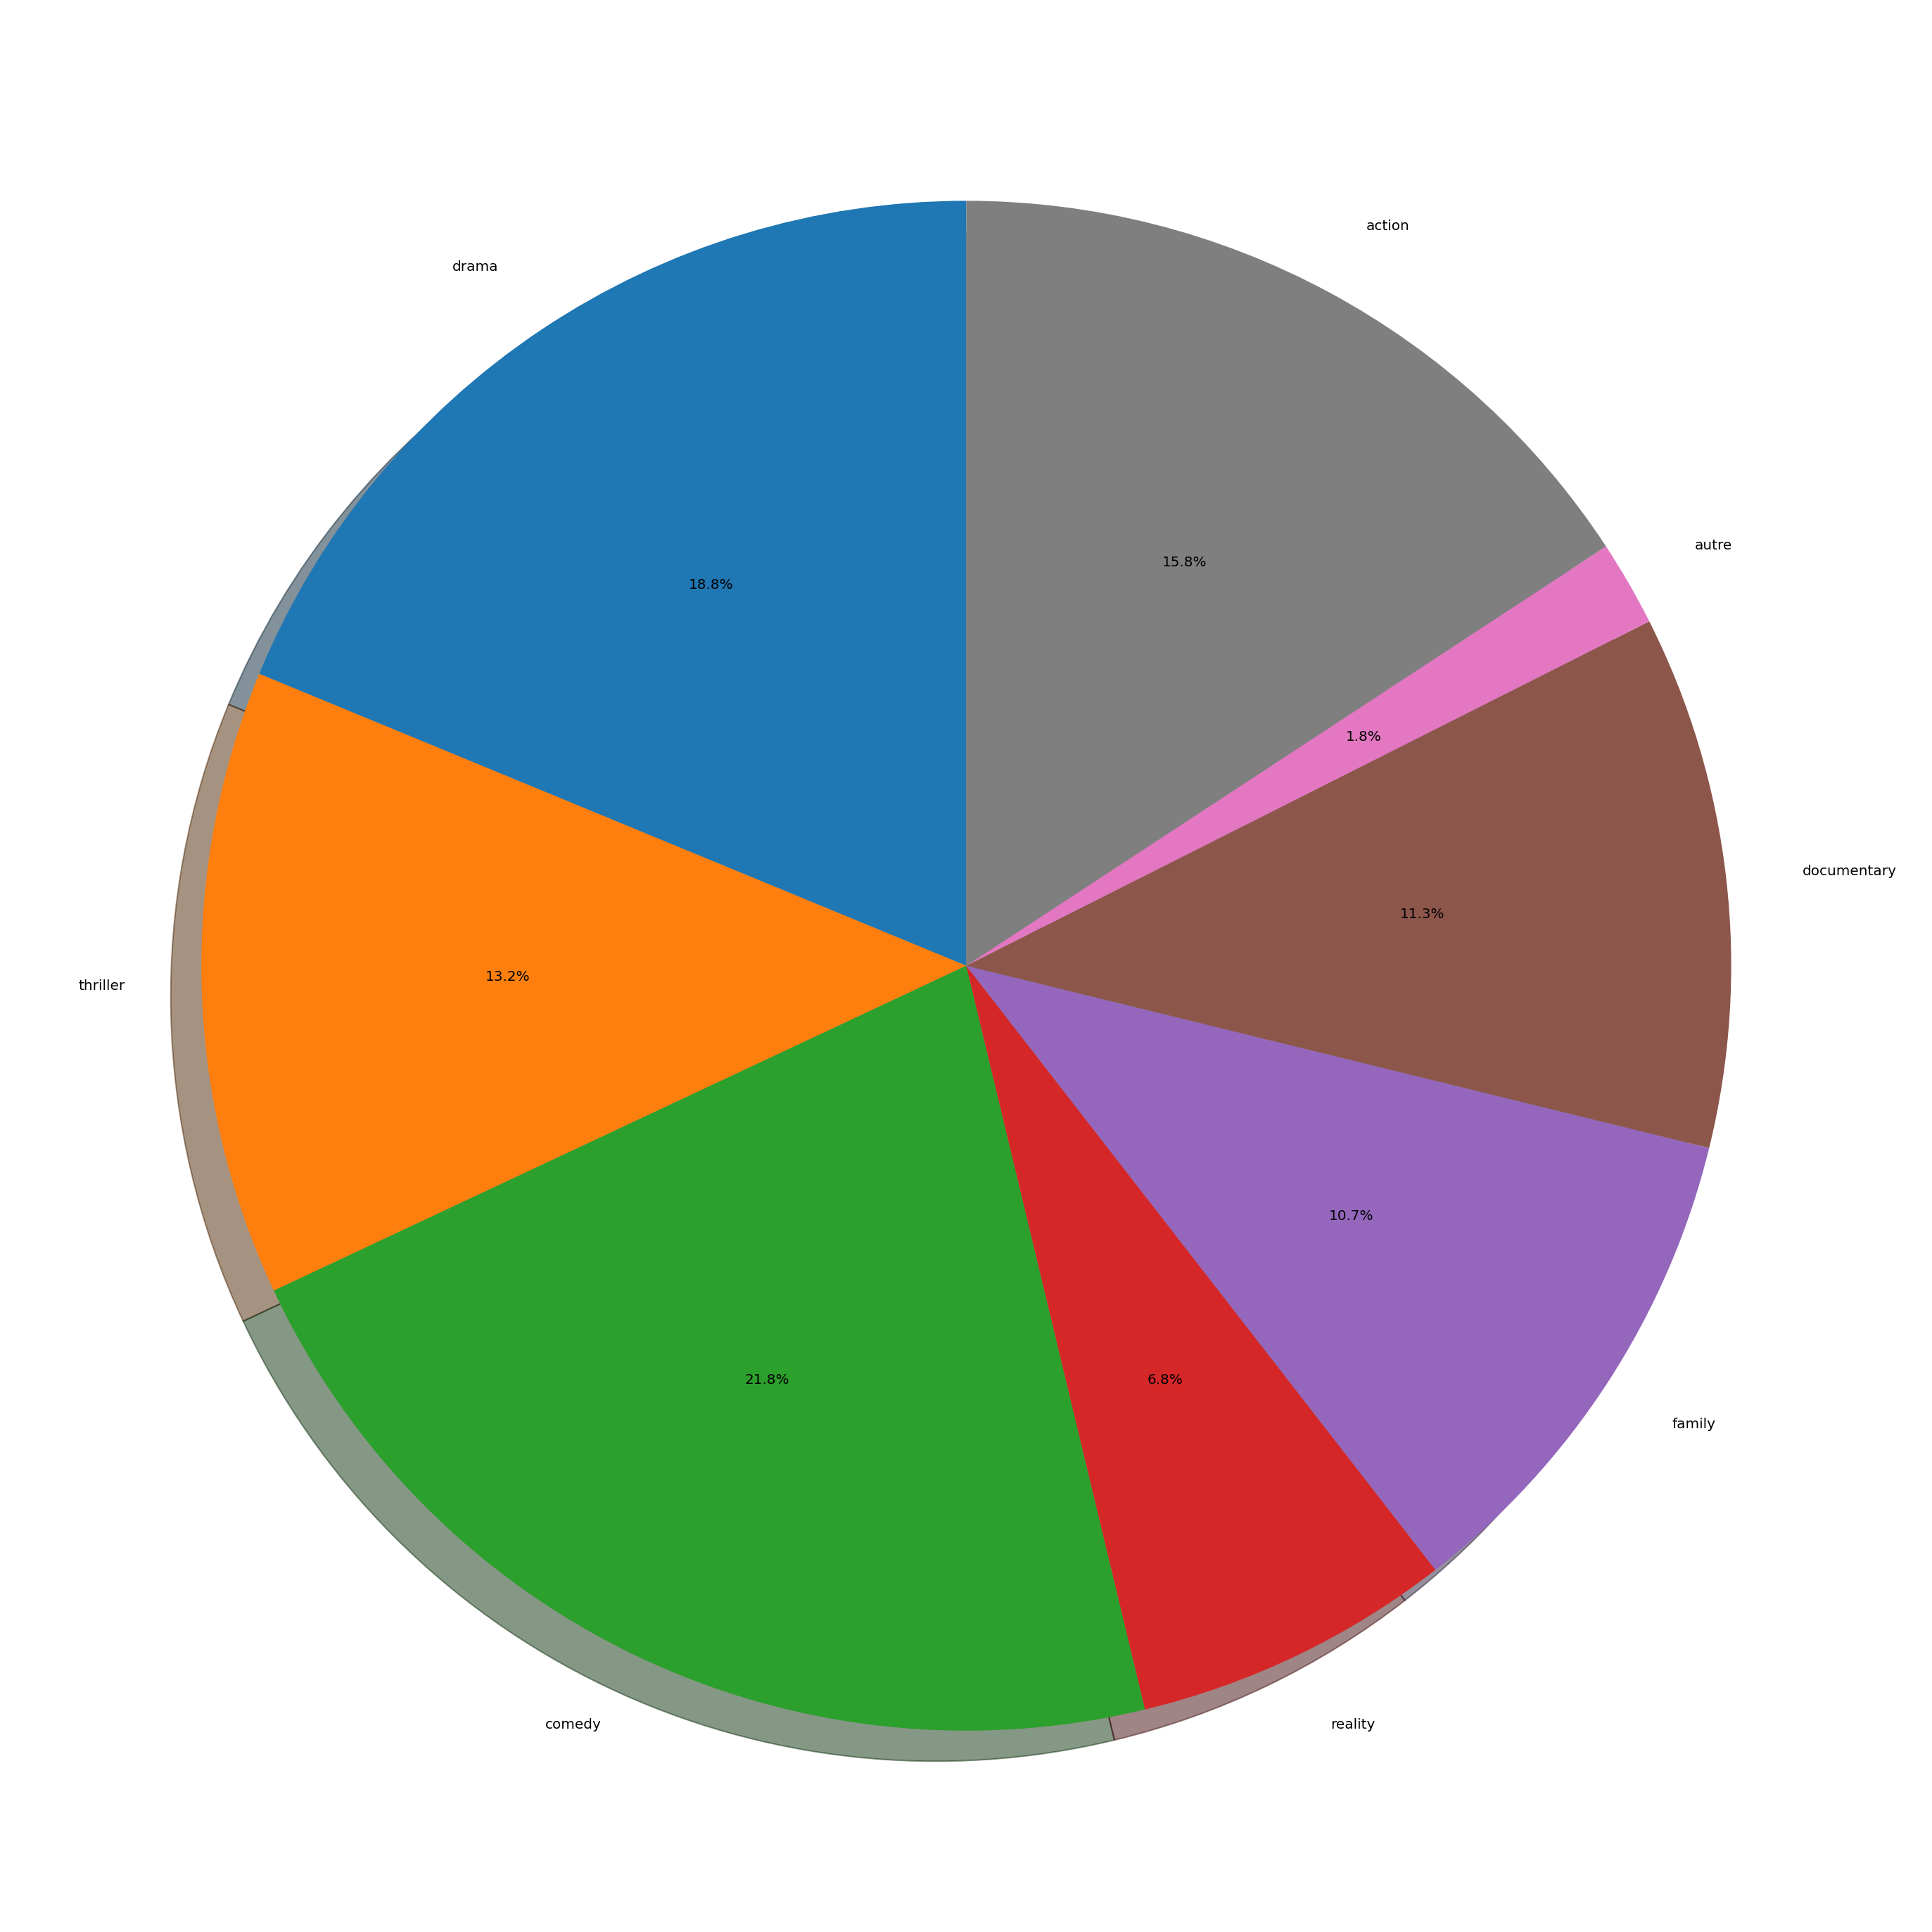

In [406]:
from collections import Counter
import matplotlib.pyplot as plt
count = Counter(hh['Genre'])
list_genre = []
list_valeur = []
for i in  count:
    list_genre.append(i)
    list_valeur.append(count[i])
plt.figure(figsize=(25,25))
plt.pie(list_valeur, labels=list_genre, 
        autopct='%1.1f%%', shadow=True, startangle=90)
print('Distribution Genre')

In [407]:
xtrain, xval, ytrain, yval = train_test_split(hh['subtitles'], hh['Genre'], test_size=0.05, random_state=9)

In [408]:
tfidf_vectorizer = TfidfVectorizer(min_df=0.0,max_df=0.95, max_features=10000)

In [409]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [410]:
lr = LogisticRegression()
#clf = OneVsRestClassifier(lr)

In [411]:
# fit model on train data
lr.fit(xtrain_tfidf, ytrain)

LogisticRegression()

In [412]:
# make predictions for validation set
y_pred = lr.predict(xval_tfidf)

In [413]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.4117647058823529

In [414]:
b=OneVsRestClassifier(lr)
b.fit(xtrain_tfidf, ytrain) 
y_pred = b.predict(xval_tfidf)
f1_score(yval, y_pred, average="micro")

0.4411764705882353

In [415]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(xtrain_tfidf, ytrain) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [416]:
y_pred = classifier.predict(xval_tfidf)

In [417]:
f1_score(yval, y_pred, average="micro")

0.3235294117647059

In [418]:
c=OneVsRestClassifier(classifier)
c.fit(xtrain_tfidf, ytrain) 

OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=1000,
                                                     random_state=0))

In [419]:
y_pred = c.predict(xval_tfidf)
f1_score(yval, y_pred, average="micro")

0.47058823529411764

In [420]:
param_grid = { "n_estimators"      : [250, 1000],
           "criterion"         : ["gini", "entropy"],
           "max_features"      : [3,4,5],
           "max_depth"         : [10, 20],
           "min_samples_split" : [2, 4] ,
           "bootstrap": [True, False]}

In [421]:
grid_search = GridSearchCV(classifier, param_grid, n_jobs=-1, cv=10)
grid_search.fit(xtrain_tfidf, ytrain)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 5, 'min_samples_split': 4, 'n_estimators': 250}
0.41448412698412695


In [422]:
abc = AdaBoostClassifier()
abc.fit(xtrain_tfidf,ytrain)
y_pred = abc.predict(xval_tfidf)
abc.score(xval_tfidf,yval)

0.29411764705882354

In [423]:
param_grid = {"n_estimators" : [100,200,1000],
              "learning_rate" : [0.1,0.001,1]
              }

In [424]:
grid_search = GridSearchCV(abc, param_grid, n_jobs=-1, cv=10)
grid_search.fit(xtrain_tfidf, ytrain)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'n_estimators': 200}
0.37490079365079365


In [41]:
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from sklearn.linear_model import (LogisticRegression, LogisticRegressionCV,
                                  SGDClassifier)
from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [38]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )

In [39]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(degree=2, alpha=0.01):
    train_sizes = np.linspace(0.05, 1, 20)
    logit_pipe = Pipeline(
        [
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=degree)),
            ("sgd_logit", SGDClassifier(n_jobs=-1, random_state=17, alpha=alpha)),
        ]
    )
    N_train, val_train, val_test = learning_curve(
        logit_pipe, base['subtitles'],  base['genre'], train_sizes=train_sizes, cv=5, scoring="roc_auc"
    )
    plot_with_err(N_train, val_train, label="training scores")
    plot_with_err(N_train, val_test, label="validation scores")
    plt.xlabel("Training Set Size")
    plt.ylabel("AUC")
    plt.legend()

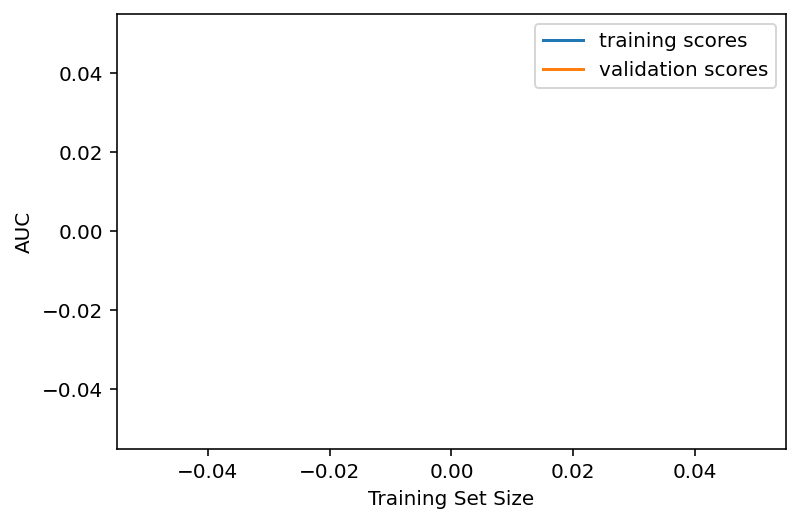

In [43]:
plot_learning_curve(degree=2, alpha=10)

In [28]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [29]:
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [30]:
def infer_tags(q):
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return q_pred

In [142]:
for i in range(5): 
  k = xval.sample(1).index[0] 
  print("Movie: ", base['movie'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",base['Genre'][k], "\n")


Movie:  tilt 
Predicted genre:  ['drama']
Actual genre:  drama 

Movie:  dalziel and pascoe 
Predicted genre:  ['drama']
Actual genre:  thriller 

Movie:  deadliest catch 
Predicted genre:  ['comedy']
Actual genre:  documentary 

Movie:  nashville 
Predicted genre:  ['comedy']
Actual genre:  drama 

Movie:  the rockford files 
Predicted genre:  ['comedy']
Actual genre:  action 

